# Chapter 8: Calculation of Molecular Properties

## 8.5. Vibrational Frequency Analysis

Computational methods allows the calculation the vibrational modes of a molecule. It's not only helpful in predicting IR and Raman spectra but also in confirming whether a geometry corresponds to a minimum (all positive frequencies) or a saddle point (one or more negative frequencies) on the potential energy surface.

In the following section, we will calculate the vibrational energy of acetic acid and predict its IR spectra:

### 8.5.1. Vibrational Frequency Calculation

In [1]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import AllChem
from utils import View3DModel
import psi4
import py3Dmol

In [2]:
# Create a molecule of acetic acid
mol = Chem.MolFromSmiles('CC(=O)O')

# Prepare the molecule
mol = Chem.AddHs(mol)
AllChem.EmbedMolecule(mol, useRandomCoords=True)
AllChem.UFFOptimizeMolecule(mol, maxIters=200)

0

In [3]:
# View 3D model with py3Dmol
View3DModel(mol)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [4]:
# Set the number of threads and memory limit
psi4.set_num_threads(16)
psi4.set_memory(16*1024*1024*1024) # 16 GB

17179869184

In [5]:
# Set calculation options
psi4.set_options({
    'BASIS': '6-31G*',
    'SCF_TYPE': 'DF',
    'REFERENCE': 'RHF'
})

In [6]:
# Write the geometry to XYZ string
xyz_string = Chem.MolToXYZBlock(mol)

# Get the psi4 geometry
geometry = psi4.geometry(xyz_string)

# Perform geometry optimization
psi4.optimize('b3lyp', molecule=geometry, return_wfn=True)

	Previous geometry is closer to target in internal coordinates, so using that one.

	Best geometry has RMS(Delta(q)) = 1.66e-04

	Energy has increased in a minimization.
	Energy ratio indicates iffy step.
	Intrafrag trust radius decreased to 2.500e-01.
	Previous geometry is closer to target in internal coordinates, so using that one.

	Best geometry has RMS(Delta(q)) = 1.85e-05

	Previous geometry is closer to target in internal coordinates, so using that one.

	Best geometry has RMS(Delta(q)) = 6.42e-06

	Change in internal coordinate of 5.16e-01 exceeds limit of 5.00e-01.
	Skipping Hessian update for step 5.
	Change in internal coordinate of 5.85e-01 exceeds limit of 5.00e-01.
	Skipping Hessian update for step 4.
	Change in internal coordinate of 5.58e-01 exceeds limit of 5.00e-01.
	Skipping Hessian update for step 3.
	Change in internal coordinate of 5.65e-01 exceeds limit of 5.00e-01.
	Skipping Hessian update for step 2.
	Change in internal coordinate of 5.55e-01 exceeds limit of 5

Optimizer: Optimization complete!


(-229.08175846993288, <psi4.core.RHF at 0x1e115bd3890>)

In [7]:
# Perform frequency analysis
energy, wfn = psi4.frequencies('b3lyp', molecule=geometry, return_wfn=True)

### 8.5.2. Infrared (IR) Spectra Prediction

After frequency analysis, the vibrational frequencies and intensities can be extracted and used for predicting IR spectrum of the molecule.

In [8]:
# Extract frequencies and intensities
frequencies = wfn.frequencies().to_array()
vib_info = wfn.frequency_analysis # This is a dictionary containing all the vibrational analysis info

# IR intensities can be extracted from 'vib_info' which contains several keys including 'IR_intensity'
ir_intensities = vib_info['IR_intensity'].data  # Make sure to extract as np.array for further use

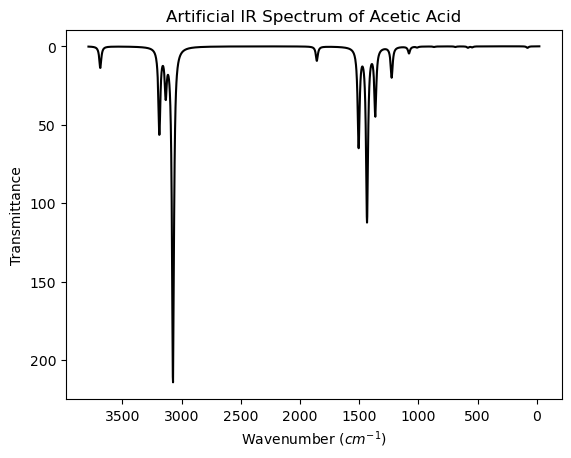

In [9]:
# Define wavenumber range
wavenumbers = np.linspace(min(frequencies) - 100, max(frequencies) + 100, 2000)

# Lorentzian function to simulate peak shapes
def lorentzian(wavenumber, position, intensity, width=10):
    return intensity * (width ** 2) / ((wavenumber - position) ** 2 + width ** 2)

# Simulate the spectrum
spectrum = np.zeros_like(wavenumbers)
for freq, intensity in zip(frequencies, ir_intensities):
    spectrum += lorentzian(wavenumbers, freq, intensity)
    
# Plot the artificial IR spectrum
plt.plot(wavenumbers, spectrum, 'k')
plt.gca().invert_xaxis() # Invert the x-axis
plt.gca().invert_yaxis() # Invert the y-axis
plt.xlabel('Wavenumber ($cm^{-1}$)')
plt.ylabel('Transmittance')
plt.title('Artificial IR Spectrum of Acetic Acid')
plt.show()

### 8.5.3. Calculation of Thermodynamic Properties

Within the context of computational chemistry and using software like Psi4, you can calculate thermodynamic properties such as the Gibbs free energy $G$, enthalpy $H$, and entropy $S$ for a molecule at a given temperature.

In the following section, we will calculate the thermodynamic properties of toluene at 300 K.

In [10]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import AllChem
from utils import View3DModel
import psi4
import py3Dmol

In [11]:
# Define the molecule
acetic_acid_smiles = 'c1ccccc1C'
mol = Chem.MolFromSmiles(acetic_acid_smiles)
mol = Chem.AddHs(mol)
AllChem.EmbedMolecule(mol, useRandomCoords=True)
AllChem.UFFOptimizeMolecule(mol, maxIters=200)

0

In [12]:
# View 3D model with py3Dmol
View3DModel(mol)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [13]:
# Set the number of threads and memory limit
psi4.set_num_threads(16)
psi4.set_memory(16*1024*1024*1024) # 16 GB

17179869184

In [14]:
# Set calculation options
temperature = 300 # K
pressure = 101325 # Pa (1 atm)
psi4.set_options({
    'BASIS': '6-31G*',
    'SCF_TYPE': 'DF',
    'REFERENCE': 'RHF',
    'T': temperature,
    'P': pressure
})

In [15]:
# Write the geometry to XYZ string
xyz_string = Chem.MolToXYZBlock(mol)

# Get the psi4 geometry
geometry = psi4.geometry(xyz_string)

# Perform geometry optimization
psi4.optimize('b3lyp', molecule=geometry, return_wfn=True)

	Previous geometry is closer to target in internal coordinates, so using that one.

	Best geometry has RMS(Delta(q)) = 1.42e-04

	Previous geometry is closer to target in internal coordinates, so using that one.

	Best geometry has RMS(Delta(q)) = 4.10e-06

	Previous geometry is closer to target in internal coordinates, so using that one.

	Best geometry has RMS(Delta(q)) = 5.48e-07

	Previous geometry is closer to target in internal coordinates, so using that one.

	Best geometry has RMS(Delta(q)) = 5.05e-08



Optimizer: Optimization complete!


(-271.5666305157239, <psi4.core.RHF at 0x1e115dc28d0>)

In [16]:
# Perform frequency analysis
frequency_results = psi4.frequencies('b3lyp', molecule=geometry, return_wfn=True)

In [17]:
# Extract thermodynamic parameters
E_h = psi4.core.variable('DFT TOTAL ENERGY') * psi4.constants.hartree2kcalmol # Use 'HF TOTAL ENERGY' or 'SCF TOTAL ENERGY' if you are running HF or SCF calculation
zpve = psi4.core.variable('ZPVE') * psi4.constants.hartree2kcalmol # At 0K
e_thermo_corr = psi4.core.variable('THERMAL ENERGY CORRECTION') * psi4.constants.hartree2kcalmol
e_thermo = psi4.core.variable('THERMAL ENERGY') * psi4.constants.hartree2kcalmol # Equal to E_h + e_thermo_corr
h_corr = psi4.core.variable('ENTHALPY CORRECTION') * psi4.constants.hartree2kcalmol
h = psi4.core.variable('ENTHALPY') * psi4.constants.hartree2kcalmol # Equal to E_h + h_corr
g_corr = psi4.core.variable('GIBBS FREE ENERGY CORRECTION') * psi4.constants.hartree2kcalmol
g = psi4.core.variable('GIBBS FREE ENERGY') * psi4.constants.hartree2kcalmol # Equal to E_h + g_corr
s = (h - g) / 300 # G = H - TS

In [18]:
# Print out the results in kcal/mol
print(f"Zero-Point Vibrational Energy (ZPVE): {zpve:.2f} kcal/mol")
print(f"Thermal Energy: {e_thermo:.2f} kcal/mol")
print(f"Enthalpy (H): {h:.2f} kcal/mol")
print(f"Entropy (S): {s:.2f} kcal/mol")
print(f"Gibbs Free Energy (G): {g:.2f} kcal/mol")

Zero-Point Vibrational Energy (ZPVE): 80.51 kcal/mol
Thermal Energy: -170326.18 kcal/mol
Enthalpy (H): -170325.58 kcal/mol
Entropy (S): 0.08 kcal/mol
Gibbs Free Energy (G): -170349.61 kcal/mol
